In [2]:
import pandas as pd
import numpy as np
import numpy.random as random
from route_functions import *
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm 
import os

# to ignore warning on calculations
import warnings
warnings.filterwarnings("ignore")

In [3]:
def ecdf2(target1, target2, title):
    numbs1, numbs2 = np.array(target1), np.array(target2)
    ecdf1, ecdf2 = sm.distributions.ECDF(numbs1), sm.distributions.ECDF(numbs2)
    x1, x2 = np.linspace(min(numbs1), max(numbs1), len(target2)), np.linspace(min(numbs2), max(numbs2), len(target1))
    y1, y2 = ecdf1(x1), ecdf2(x2)
    plt.step(x1, y1, color='red')
    plt.step(x2, y2, color='blue')
    plt.xlabel(title)
    plt.ylabel('CDF(P)')
    plt.title('Empirical CDF of ' + title)
    plt.show()
    return

def inv_ecdf2(target1, target2, title):
    numbs1, numbs2 = np.array(target1), np.array(target2)
    ecdf1, ecdf2 = sm.distributions.ECDF(numbs1), sm.distributions.ECDF(numbs2)
    x1, x2 = np.linspace(min(numbs1), max(numbs1), len(target2)), np.linspace(min(numbs2), max(numbs2), len(target1))
    y1, y2 = 1-ecdf1(x1), 1-ecdf2(x2)
    plt.step(x1, y1, color='red')
    plt.step(x2, y2, color='blue')
    plt.xlabel(title)
    plt.ylabel('CDF(P)')
    plt.title('Empirical CDF of ' + title)
    #plt.gca().invert_yaxis()
    plt.show()
    return

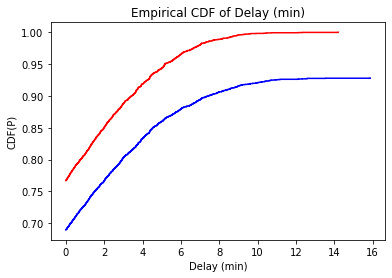

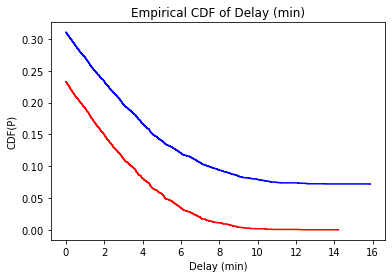

In [6]:
path = r"C:\Users\krishrao\Desktop\Laptop Backup\Krishna\Fall'21\IOE 574\Term Project\IOE574_Project\data_files\LiqFuel_SensAnalysis\buses\\"

file1 = 'bd_table_refill_10_40_0.071_0.061.parquet'    # put the worst case scenario here (max delay)
file2 = 'bd_table_refill_10_80_0.071_0.061.parquet'    # put the best case scenario here (min delay)

file = pd.read_parquet(path+file1)
delay1 = np.array(file['Demand_Current'] - file['Demand_Actual'])
file = pd.read_parquet(path+file2)
delay2 = np.array(file['Demand_Current'] - file['Demand_Actual'])

ecdf2(delay1, delay2, 'Delay (min)', file1[])
inv_ecdf2(delay1, delay2, 'Delay (min)')